In [1]:
#1.读取数据 
import numpy as np # 导入 NumPy库
import pandas as pd # 导入 Pandas库
df = pd.read_csv("G:/儿童骨密度/DATA/Raw data/p_NMID_2.csv")  # 读取文件,删除过拟合变量后数据，总共27个变量，data Interpolation2
df.head() # 显示前 5行数据

,Gender,Age,Weight,Height,BMI,Total BMD,Lumbar spine BMD,TBLH BMD,TBLH BMD Z -score,Total fat percentage,...,LDL,TC,FBG,TyG index,HOMA-IR,HbA1c,Spexin,FGF23,"1,25(OH)2D",target
0,0,11,49.0,162.9,18.47,0.97,0.74,0.88,1.07,28.4,...,2.44,2.87,5.20,8.72,2.35,5.27,0.52,46.11,65.30,1
1,0,10,41.3,161.5,15.83,0.90,0.64,0.80,1.42,28.6,...,1.40,2.68,5.14,8.23,3.05,4.59,0.52,32.61,57.26,0
2,0,11,53.0,161.1,20.42,0.97,0.72,0.85,1.92,35.7,...,2.18,3.86,4.56,8.34,2.15,4.25,0.68,69.63,65.90,1
3,1,11,50.5,161.0,19.48,0.75,0.79,0.70,1.35,26.0,...,2.31,2.72,4.87,8.53,2.87,5.16,0.55,44.47,92.20,1
4,0,11,47.2,159.4,18.58,1.05,0.82,0.92,0.82,24.0,...,2.30,3.29,5.33,8.63,2.15,4.22,0.63,39.76,25.60,1


In [2]:
df.target.value_counts() # 输出分类值 , 及各个类别数目

0    167
1    165
Name: target, dtype: int64

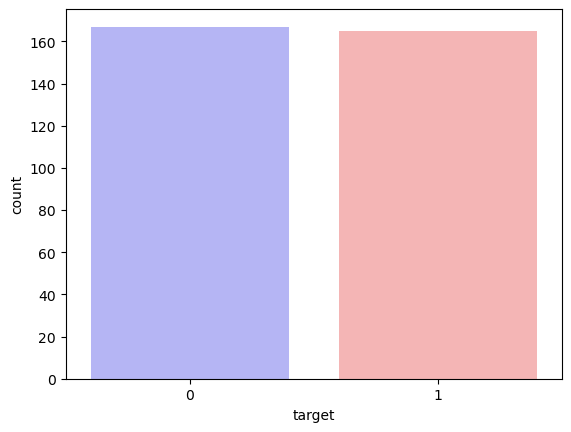

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns #导入seaborn画图工具箱
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [4]:
#df = df.drop(columns = ['ID'])#去除ID列
df.head()

,Gender,Age,Weight,Height,BMI,Total BMD,Lumbar spine BMD,TBLH BMD,TBLH BMD Z -score,Total fat percentage,...,LDL,TC,FBG,TyG index,HOMA-IR,HbA1c,Spexin,FGF23,"1,25(OH)2D",target
0,0,11,49.0,162.9,18.47,0.97,0.74,0.88,1.07,28.4,...,2.44,2.87,5.20,8.72,2.35,5.27,0.52,46.11,65.30,1
1,0,10,41.3,161.5,15.83,0.90,0.64,0.80,1.42,28.6,...,1.40,2.68,5.14,8.23,3.05,4.59,0.52,32.61,57.26,0
2,0,11,53.0,161.1,20.42,0.97,0.72,0.85,1.92,35.7,...,2.18,3.86,4.56,8.34,2.15,4.25,0.68,69.63,65.90,1
3,1,11,50.5,161.0,19.48,0.75,0.79,0.70,1.35,26.0,...,2.31,2.72,4.87,8.53,2.87,5.16,0.55,44.47,92.20,1
4,0,11,47.2,159.4,18.58,1.05,0.82,0.92,0.82,24.0,...,2.30,3.29,5.33,8.63,2.15,4.22,0.63,39.76,25.60,1


In [5]:
#2.构建特征集和标签集
X = df.drop(['target'], axis = 1) # 构建特征集
y = df.target.values # 构建标签集
y = y.reshape(-1, 1) # -1是相对索引 , 等价于 len(y)
print("张量 X的形状 :", X.shape)
print("张量 y的形状 :", y.shape)

张量 X的形状 : (332, 22)
张量 y的形状 : (332, 1)


In [6]:
#3.拆分数据集
#按照 80%/20% 的比例准备训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=2023)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler() 
X_train = scaler.ﬁt_transform(X_train) 
X_test = scaler.transform(X_test) 

D:\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Info] Number of positive: 104, number of negative: 108
[LightG

D:\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

<Axes: title={'center': 'LGBM(Best Score) Confusion Matrix'}>

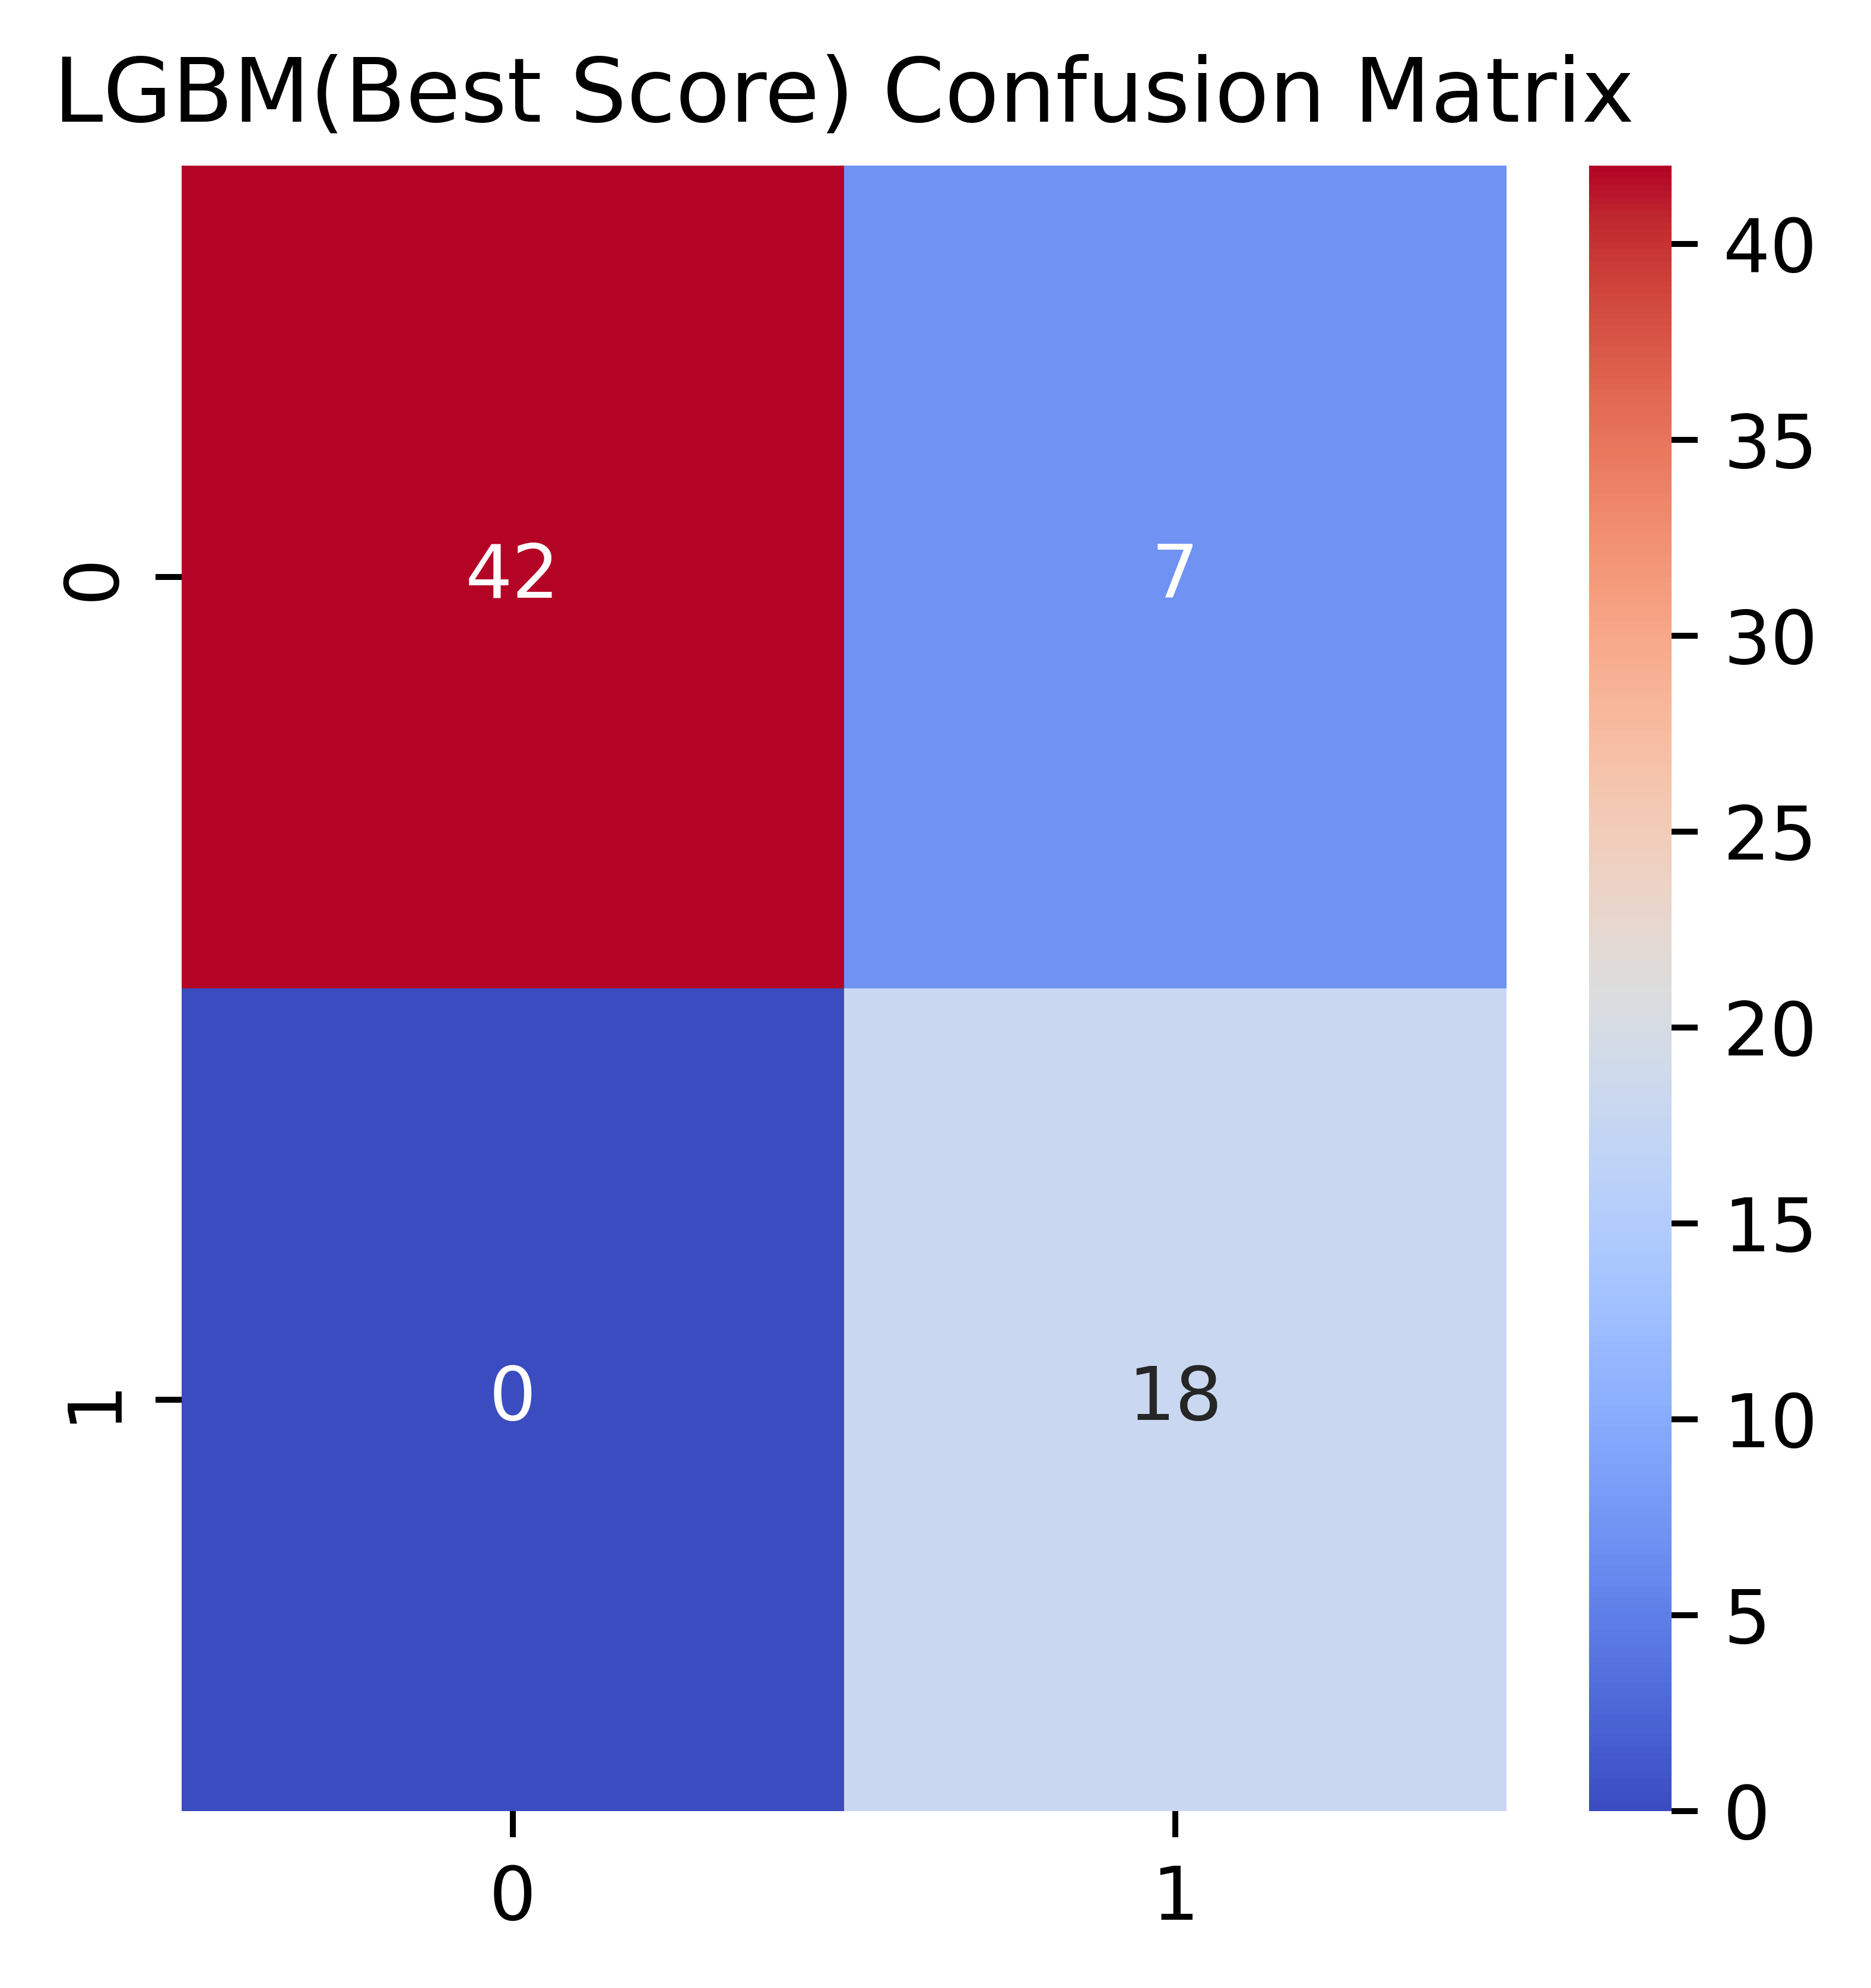

In [8]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (f1_score, confusion_matrix) # 导入评估指标 
from sklearn.metrics import classiﬁcation_report # 导入分类报告
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
model = lgb.LGBMClassifier()
 
param_grid = {
    'learning_rate': [0.1, 0.01],#最佳0.1
    'max_depth':[-1] ,
    'num_leaves':[31] ,
    'min_data_in_leaf':[20] ,
    'feature_fraction':[1] ,
    'bagging_fraction':[1] ,
    'bagging_freq':[0] ,
    'max_bin':[255] ,
    'n_estimators': [20, 40]#最佳40
    
}
gscv =GridSearchCV(model, param_grid, cv=5)
gscv.fit(X_train, y_train)

lgb_y_pred = gscv.predict(X_test) # 进行预测
lgb_y_prob = gscv.predict_proba(X_test)[:,1]
best_params = gscv.best_params_
print(best_params)#最佳超参数
cm_lgbgs = confusion_matrix(y_test, lgb_y_pred) # 显示混淆矩阵
lgb_gs = gscv.best_estimator_ # 最佳模型
lgb_acc = gscv.score(X_test, y_test)*100
cm_dot_four = confusion_matrix(lgb_y_prob >= 0.52, lgb_y_pred)
plt.figure(figsize=(4, 4), dpi=900)#设置图片大小，像素
print('LGBM混淆矩阵:\n', cm_dot_four)
plt.title("LGBM(Best Score) Confusion Matrix")#KNN（最优参数）混淆矩阵
sns.heatmap(cm_dot_four, annot=True, cmap="coolwarm", fmt="d", cbar="TRUE")

In [9]:
import numpy as np
from scipy.stats import sem
from sklearn.metrics import roc_auc_score

y_pred = lgb_y_prob
y_true = y_test

print("Original ROC area: {:0.3f}".format(roc_auc_score(y_true, y_pred)))

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

Original ROC area: 0.715
Bootstrap #1 ROC area: 0.669
Bootstrap #2 ROC area: 0.633
Bootstrap #3 ROC area: 0.606
Bootstrap #4 ROC area: 0.819
Bootstrap #5 ROC area: 0.750
Bootstrap #6 ROC area: 0.817
Bootstrap #7 ROC area: 0.729
Bootstrap #8 ROC area: 0.779
Bootstrap #9 ROC area: 0.715
Bootstrap #10 ROC area: 0.723
Bootstrap #11 ROC area: 0.705
Bootstrap #12 ROC area: 0.703
Bootstrap #13 ROC area: 0.746
Bootstrap #14 ROC area: 0.772
Bootstrap #15 ROC area: 0.728
Bootstrap #16 ROC area: 0.839
Bootstrap #17 ROC area: 0.734
Bootstrap #18 ROC area: 0.581
Bootstrap #19 ROC area: 0.680
Bootstrap #20 ROC area: 0.632
Bootstrap #21 ROC area: 0.726
Bootstrap #22 ROC area: 0.768
Bootstrap #23 ROC area: 0.788
Bootstrap #24 ROC area: 0.794
Bootstrap #25 ROC area: 0.800
Bootstrap #26 ROC area: 0.676
Bootstrap #27 ROC area: 0.716
Bootstrap #28 ROC area: 0.591
Bootstrap #29 ROC area: 0.693
Bootstrap #30 ROC area: 0.688
Bootstrap #31 ROC area: 0.716
Bootstrap #32 ROC area: 0.831
Bootstrap #33 ROC area: 

Bootstrap #447 ROC area: 0.652
Bootstrap #448 ROC area: 0.683
Bootstrap #449 ROC area: 0.824
Bootstrap #450 ROC area: 0.816
Bootstrap #451 ROC area: 0.603
Bootstrap #452 ROC area: 0.695
Bootstrap #453 ROC area: 0.796
Bootstrap #454 ROC area: 0.722
Bootstrap #455 ROC area: 0.719
Bootstrap #456 ROC area: 0.801
Bootstrap #457 ROC area: 0.715
Bootstrap #458 ROC area: 0.704
Bootstrap #459 ROC area: 0.776
Bootstrap #460 ROC area: 0.781
Bootstrap #461 ROC area: 0.794
Bootstrap #462 ROC area: 0.791
Bootstrap #463 ROC area: 0.751
Bootstrap #464 ROC area: 0.810
Bootstrap #465 ROC area: 0.744
Bootstrap #466 ROC area: 0.759
Bootstrap #467 ROC area: 0.742
Bootstrap #468 ROC area: 0.718
Bootstrap #469 ROC area: 0.717
Bootstrap #470 ROC area: 0.701
Bootstrap #471 ROC area: 0.677
Bootstrap #472 ROC area: 0.693
Bootstrap #473 ROC area: 0.718
Bootstrap #474 ROC area: 0.751
Bootstrap #475 ROC area: 0.737
Bootstrap #476 ROC area: 0.635
Bootstrap #477 ROC area: 0.766
Bootstrap #478 ROC area: 0.699
Bootstra

Bootstrap #923 ROC area: 0.663
Bootstrap #924 ROC area: 0.767
Bootstrap #925 ROC area: 0.727
Bootstrap #926 ROC area: 0.853
Bootstrap #927 ROC area: 0.738
Bootstrap #928 ROC area: 0.684
Bootstrap #929 ROC area: 0.605
Bootstrap #930 ROC area: 0.738
Bootstrap #931 ROC area: 0.710
Bootstrap #932 ROC area: 0.644
Bootstrap #933 ROC area: 0.652
Bootstrap #934 ROC area: 0.694
Bootstrap #935 ROC area: 0.564
Bootstrap #936 ROC area: 0.793
Bootstrap #937 ROC area: 0.677
Bootstrap #938 ROC area: 0.649
Bootstrap #939 ROC area: 0.750
Bootstrap #940 ROC area: 0.691
Bootstrap #941 ROC area: 0.690
Bootstrap #942 ROC area: 0.625
Bootstrap #943 ROC area: 0.674
Bootstrap #944 ROC area: 0.723
Bootstrap #945 ROC area: 0.864
Bootstrap #946 ROC area: 0.681
Bootstrap #947 ROC area: 0.728
Bootstrap #948 ROC area: 0.821
Bootstrap #949 ROC area: 0.731
Bootstrap #950 ROC area: 0.758
Bootstrap #951 ROC area: 0.842
Bootstrap #952 ROC area: 0.729
Bootstrap #953 ROC area: 0.707
Bootstrap #954 ROC area: 0.720
Bootstra

In [10]:
#计算AUC95% CI
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("AUC 95%CI:[{:0.3f}-{:0.3}]".format(
    confidence_lower, confidence_upper))

AUC 95%CI:[0.604-0.817]


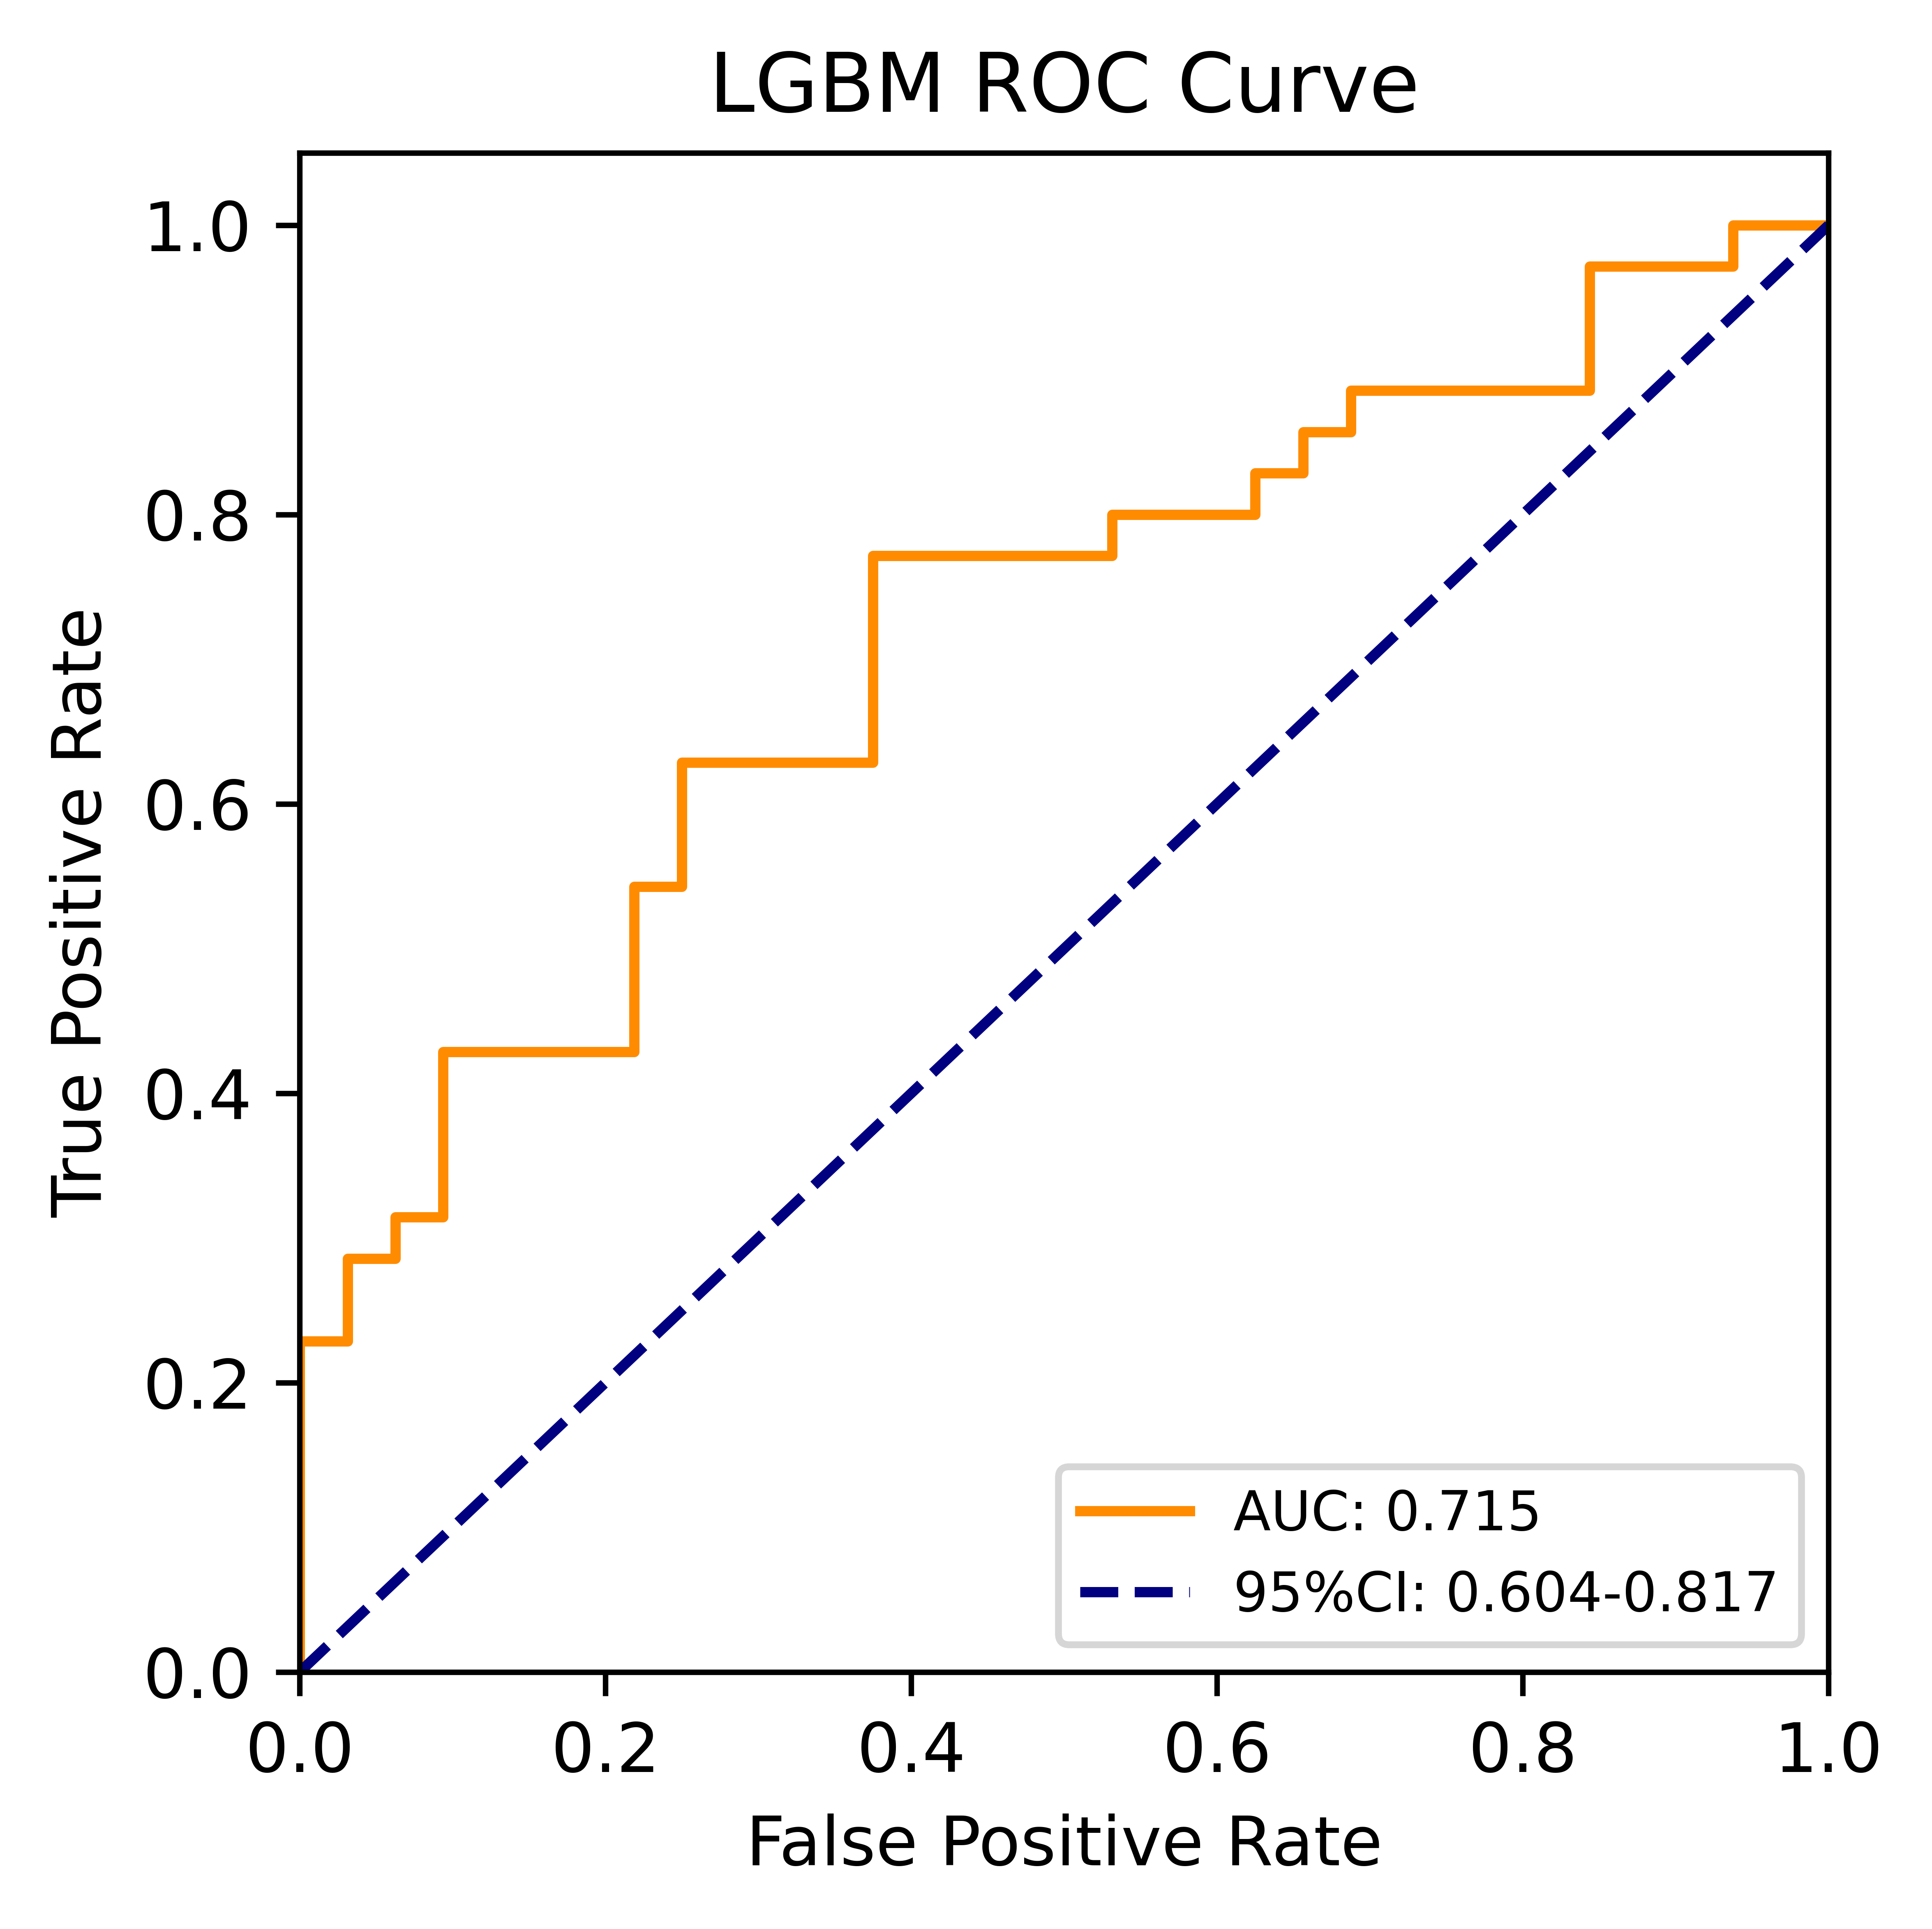

In [11]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
fpr, tpr, threshold = roc_curve(y_test,lgb_y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(4, 4), dpi=1200)
plt.plot(fpr, tpr, color='darkorange', lw=1.5, label='AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LGBM ROC Curve')
plt.legend(['AUC: %0.3f' % roc_auc, "95%CI: {:0.3f}-{:0.3}".format(
    confidence_lower, confidence_upper)],loc="lower right", prop={'size': 8},markerfirst=True)
plt.show()

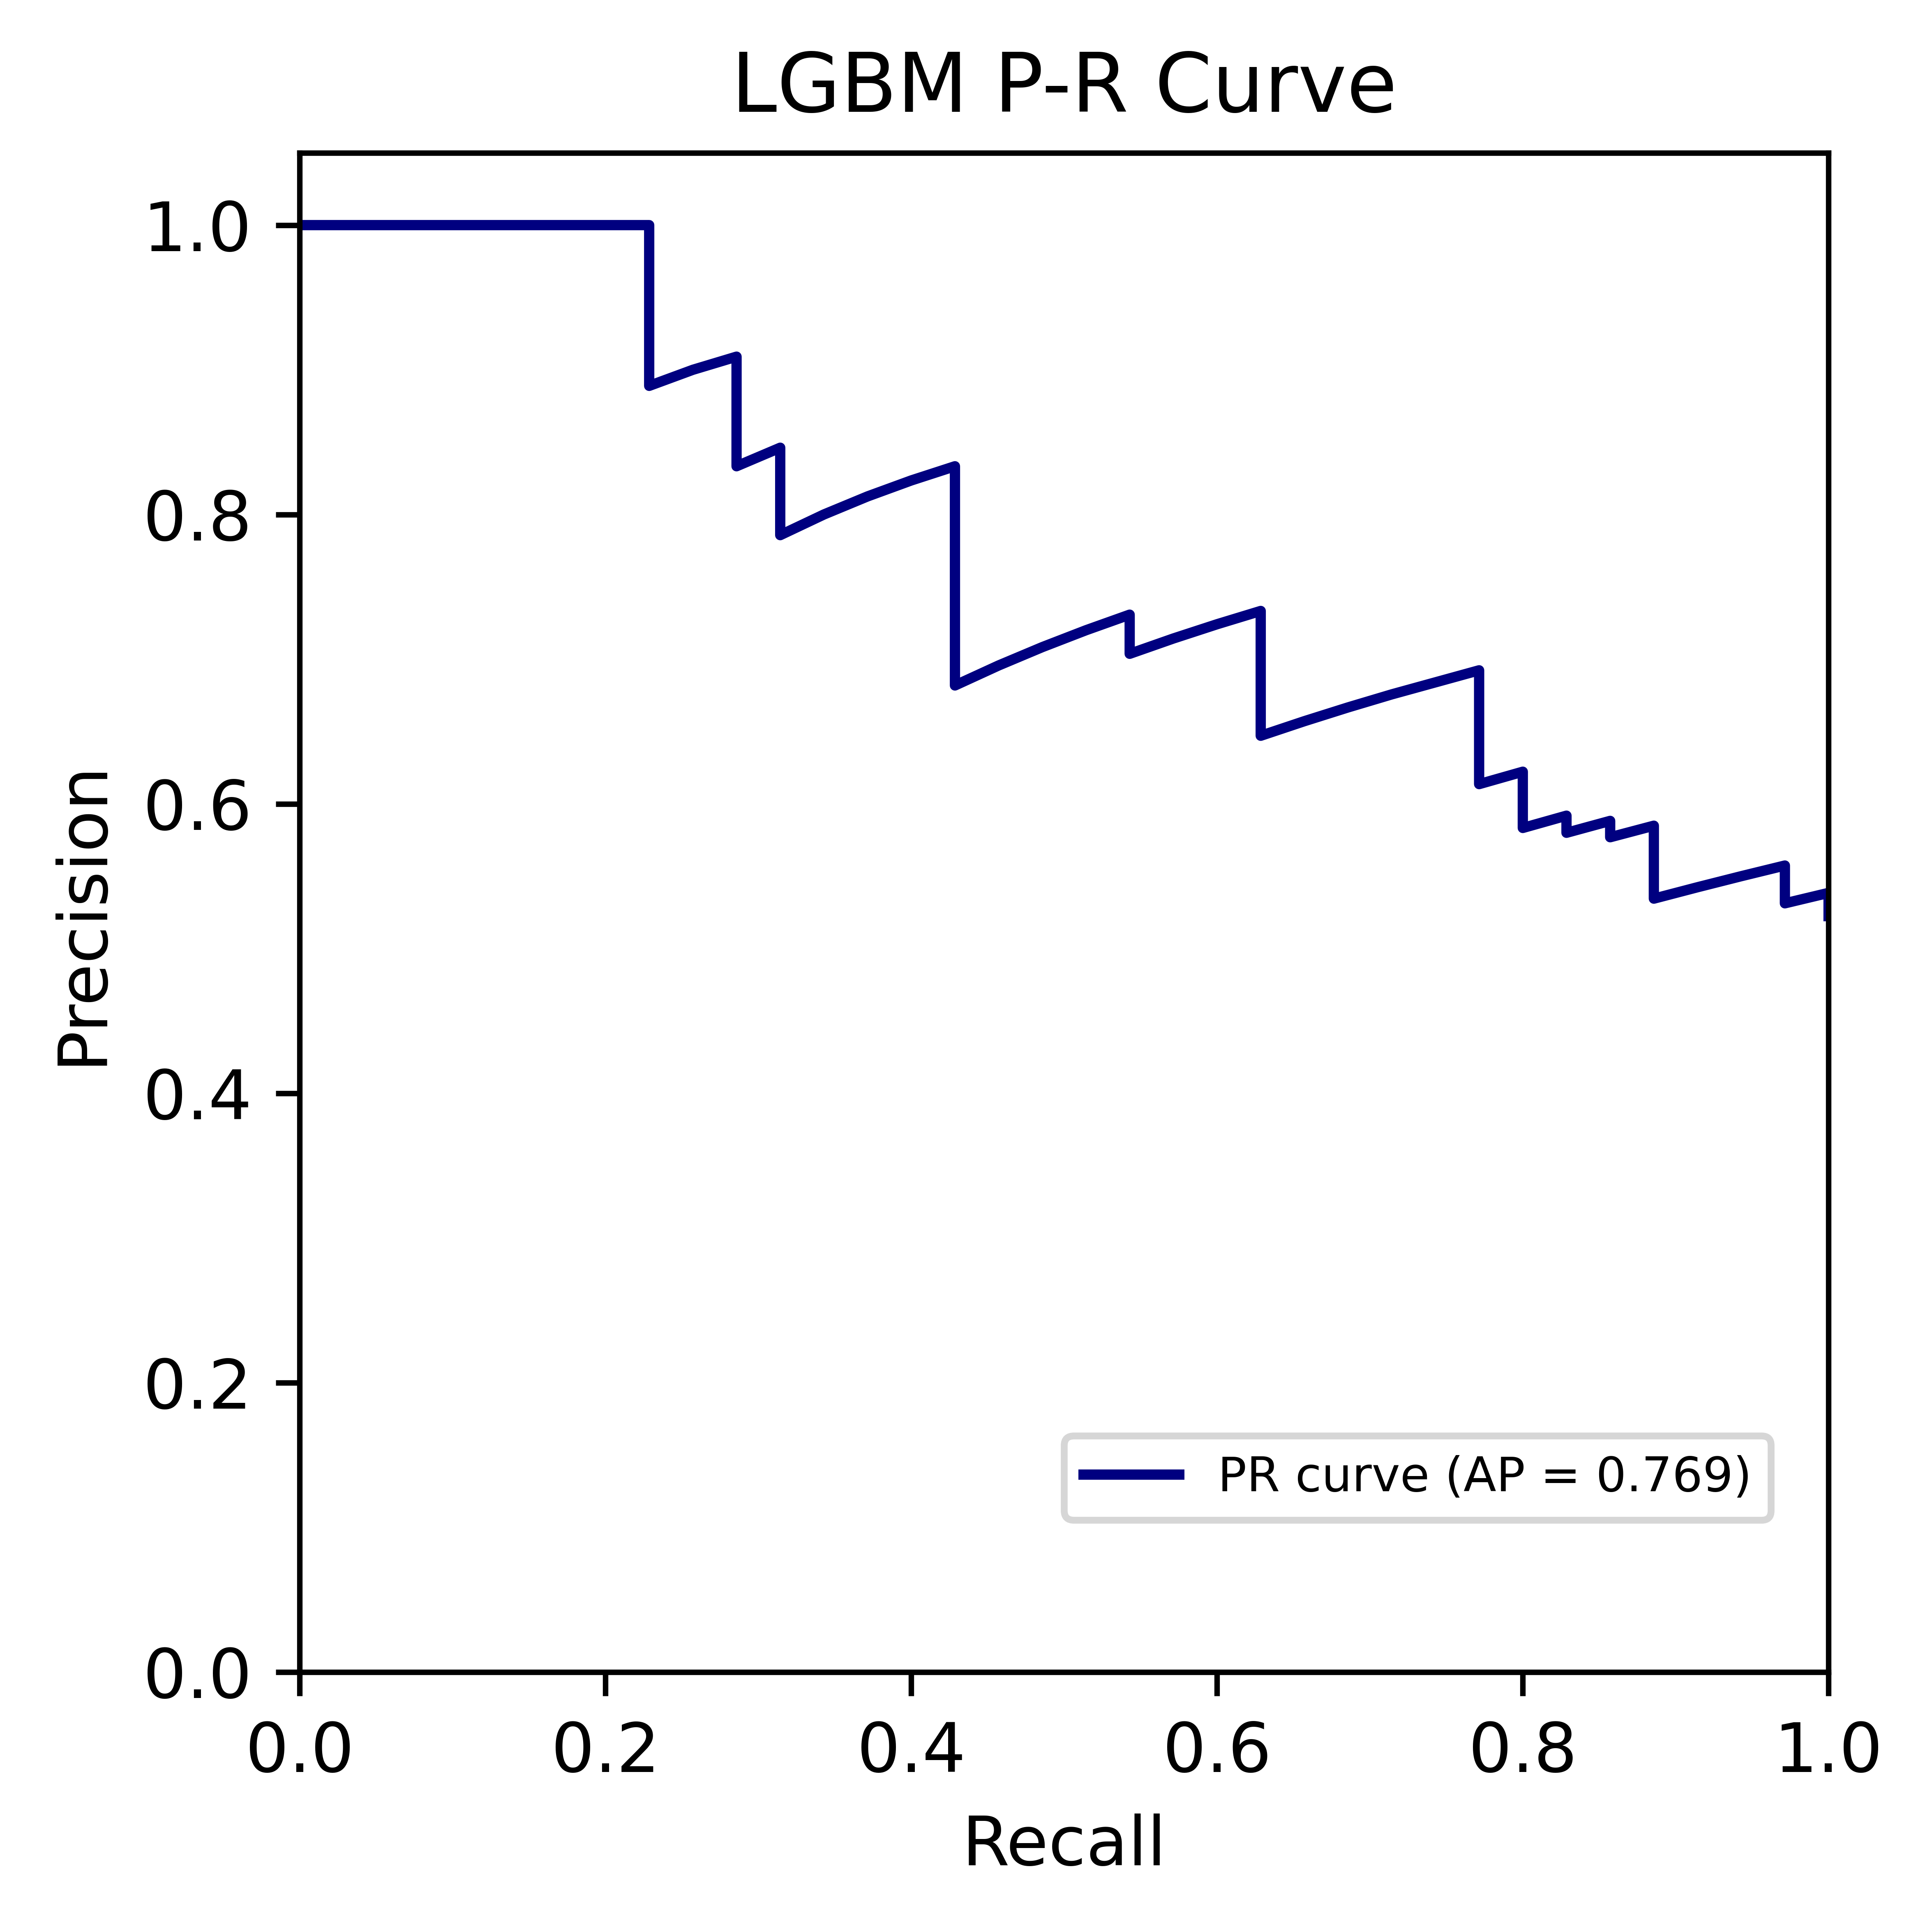

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_curve, average_precision_score

# y_true为样本实际的类别1为正例0为反例，y_scores为阈值

precision, recall, thresholds = precision_recall_curve(y_test,lgb_y_prob)
AP = average_precision_score(y_test,lgb_y_prob, average='macro', pos_label=1, sample_weight=None)
plt.figure(figsize=(4, 4), dpi=1200)
plt.plot(recall, precision, lw=1.5, color='navy', label='PR curve (AP = %0.3f)' % AP)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('LGBM P-R Curve')
plt.legend(loc=(0.5,0.1), prop={'size': 7})#标签左下角坐标，字体7号
plt.show()

In [30]:
#计算AP值，PR曲线下面积，PR曲线下面的面积越大，模型的性能越好
from sklearn.metrics import precision_recall_curve, average_precision_score
AP = average_precision_score(y_test,lgb_y_prob, average='macro', pos_label=1, sample_weight=None)
print('AP:', AP)

AP: 0.7688751766148978


In [31]:
##brier评分
from sklearn.metrics import brier_score_loss
print('Brier评分:', brier_score_loss(y_test,lgb_y_prob))

Brier评分: 0.23333921639912353
